In [69]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [70]:
import glob

In [71]:
files = glob.glob('%s/out_20171127_*node_*transformed_MVA_step2/cat_opt.json' % path)

In [72]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_120354_node_9_transformed_MVA_step2/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_120354_node_11_transformed_MVA_step2/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_120354_node_3_transformed_MVA_step2/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_120354_node_5_transformed_MVA_step2/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_120354_node_SM_transformed_MVA_step2/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_120354_node_8_transformed_MVA_step2/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/mich

In [85]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom', 'nbins'] } #,'selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']} #,'selections']  }


for fil in files:
    dirnam = fil.split('/')[-2]
    name = dirnam.split('node_')[-1]
    dirSuf = name.replace(name.split('_')[0]+'_','')
#    nbins = int(dirnam.split('_')[-3].split('x')[0])
    if name == str('SM_'+dirSuf): name = '0'
    node = int(name.replace('_'+dirSuf,''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
#        val['nbins'] = nbins
        val['boundaries'] = np.array(val['boundaries'])
        #val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [86]:
import pandas as pd
df = pd.DataFrame(summary)

In [87]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [88]:
df.sort_index(inplace=True)
df

boundaries    fom  ncat  node
ncat node                                                
3    0      [1.01, 0.93, 0.616, 0.317] -5.279     3     0
     2      [1.01, 0.81, 0.574, 0.341] -4.995     3     2
     3      [1.01, 0.803, 0.56, 0.302] -6.008     3     3
     4     [1.01, 0.926, 0.613, 0.409] -5.118     3     4
     5      [1.01, 0.788, 0.537, 0.18] -3.683     3     5
     6       [1.01, 0.93, 0.543, 0.32] -5.437     3     6
     7     [1.01, 0.807, 0.532, 0.307] -5.412     3     7
     8     [1.01, 0.716, 0.524, 0.288] -3.050     3     8
     9     [1.01, 0.836, 0.617, 0.377] -3.775     3     9
     10     [1.01, 0.79, 0.519, 0.152] -4.174     3    10
     11    [1.01, 0.788, 0.514, 0.279] -5.629     3    11
     12     [1.01, 0.81, 0.544, 0.327] -6.695     3    12
     13    [1.01, 0.802, 0.606, 0.303] -7.123     3    13

In [89]:
boundaries = np.vstack(df.loc[[3,3]]['boundaries']) 
boundaries[:,0] = 1.001
print boundaries
boundaries=boundaries[(boundaries[:,3] > 0.1)]
boundaries

[[ 1.001  0.93   0.616  0.317]
 [ 1.001  0.81   0.574  0.341]
 [ 1.001  0.803  0.56   0.302]
 [ 1.001  0.926  0.613  0.409]
 [ 1.001  0.788  0.537  0.18 ]
 [ 1.001  0.93   0.543  0.32 ]
 [ 1.001  0.807  0.532  0.307]
 [ 1.001  0.716  0.524  0.288]
 [ 1.001  0.836  0.617  0.377]
 [ 1.001  0.79   0.519  0.152]
 [ 1.001  0.788  0.514  0.279]
 [ 1.001  0.81   0.544  0.327]
 [ 1.001  0.802  0.606  0.303]]


array([[ 1.001,  0.93 ,  0.616,  0.317],
       [ 1.001,  0.81 ,  0.574,  0.341],
       [ 1.001,  0.803,  0.56 ,  0.302],
       [ 1.001,  0.926,  0.613,  0.409],
       [ 1.001,  0.788,  0.537,  0.18 ],
       [ 1.001,  0.93 ,  0.543,  0.32 ],
       [ 1.001,  0.807,  0.532,  0.307],
       [ 1.001,  0.716,  0.524,  0.288],
       [ 1.001,  0.836,  0.617,  0.377],
       [ 1.001,  0.79 ,  0.519,  0.152],
       [ 1.001,  0.788,  0.514,  0.279],
       [ 1.001,  0.81 ,  0.544,  0.327],
       [ 1.001,  0.802,  0.606,  0.303]])

In [90]:
means = boundaries.mean(axis=0)
means

array([ 1.001     ,  0.82584615,  0.56146154,  0.30015385])

In [91]:
#boundaries.std(axis=0)

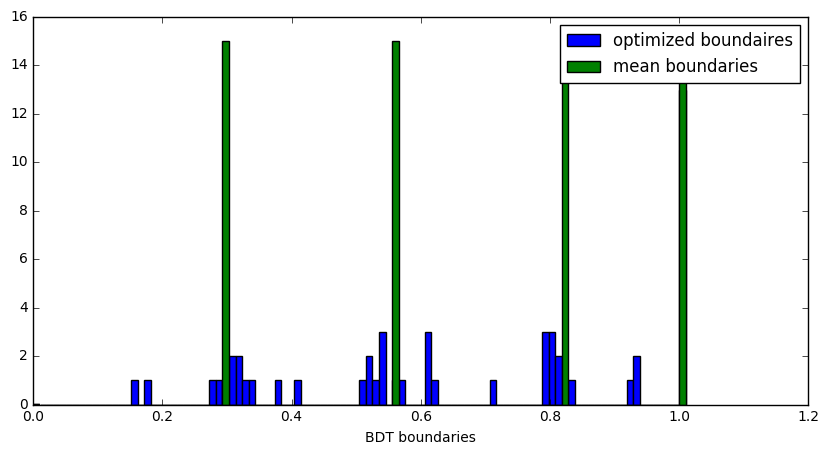

In [92]:
import matplotlib.pyplot as plt

# means[0] = 1.001
plt.figure(figsize=(10,5))
plt.hist(boundaries.ravel(),bins=100,range=[0.,1.01],label="optimized boundaires");
plt.hist(means,bins=100,range=[0.,1.01],weights=15.*np.ones_like(means),label="mean boundaries");
plt.xlabel("BDT boundaries")
plt.legend()
plt.show()

In [93]:
means

array([ 1.001     ,  0.82584615,  0.56146154,  0.30015385])